## Understanding Bussiness Problem & Motive of the Analysis

Bengaluru being one such city has more than 12,000 restaurants with restaurants serving dishes from all over the world. With each day new restaurants opening the industry has'nt been saturated yet and the demand is increasing day by day. Inspite of increasing demand it however has become difficult for new restaurants to compete with established restaurants. Most of them serving the same food.

You want to open a Restaurant in Banglore city. But you don't know what kind of food to add in your menu, where to start your restaurant, which all facilities you should include, etc. 

So with this analysis you will get a fair idea about the factors affecting the aggregate rating of each restaurant, establishment of different types of restaurant at different places, which will surely help your business to grow.

### Exploratory Data Analysis (EDA)

#### EDA is the approach to analyze the data in order to:

- Summarize main characteristics of the data
- Gain better understanding of the data
- Uncover Relationships between variables
- Extract important variables for the problem we are trying to solve

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# to display all the columns
pd.pandas.set_option("display.max_columns",None)

In [2]:
df = pd.read_csv("zomato.csv")

In [3]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
# cheking number of rows & columns in the data

print("Number of Rows :", df.shape[0])
print("Number of Columns :", df.shape[1])

Number of Rows : 51717
Number of Columns : 17


from the above dataset will remove some variables which will not add much value for the analysis "url", "phone", "dish_liked", "menu_item"

In [5]:
df.drop(["url", "address", "phone", "dish_liked", "menu_item"], axis=1, inplace=True)

In [6]:
# displaying top few rows of data
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari


### Will perform some of the basic Data Cleaning steps on the dataset

#### Renaming variables if required

In [7]:
# printing the column names to check column names are appropriate or not
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'approx_cost(for two people)', 'reviews_list',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [8]:
# renaming variables with unappropriate naming
df = df.rename(columns={"approx_cost(for two people)":"approx_cost", "listed_in(type)":"type", "listed_in(city)":"city"})

In [9]:
# printing column nmaes
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'approx_cost', 'reviews_list', 'type', 'city'],
      dtype='object')

#### Type casting (converting mismatched data type into correct data type)

In [10]:
# checking for data type of each variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          51717 non-null  object
 1   online_order  51717 non-null  object
 2   book_table    51717 non-null  object
 3   rate          43942 non-null  object
 4   votes         51717 non-null  int64 
 5   location      51696 non-null  object
 6   rest_type     51490 non-null  object
 7   cuisines      51672 non-null  object
 8   approx_cost   51371 non-null  object
 9   reviews_list  51717 non-null  object
 10  type          51717 non-null  object
 11  city          51717 non-null  object
dtypes: int64(1), object(11)
memory usage: 4.7+ MB


In [11]:
# variable "rate" & "approx_cost" have mismatch in data type
# "rate" & "approx_cost" should have numeric data type (ie. int or float) which is not present here
# type casting is required for these veriables

In [12]:
# printing unique values of variable "rate"
df.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [13]:
# replacing values "NEW" & "-" with nan
df["rate"] = np.where(df.rate=="NEW",np.nan,np.where(df.rate=="-",np.nan,df.rate))

In [14]:
# type casting "rate" variable
df["rate"] = df.rate.str.split("/", expand=True)[0].astype("float")

In [15]:
# printing unique values of variable "approx_cost"
df.approx_cost.unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [16]:
# type casting "approx_cost" variable
df["approx_cost"] = df.approx_cost.str.replace(",","").astype("float")

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          51717 non-null  object 
 1   online_order  51717 non-null  object 
 2   book_table    51717 non-null  object 
 3   rate          41665 non-null  float64
 4   votes         51717 non-null  int64  
 5   location      51696 non-null  object 
 6   rest_type     51490 non-null  object 
 7   cuisines      51672 non-null  object 
 8   approx_cost   51371 non-null  float64
 9   reviews_list  51717 non-null  object 
 10  type          51717 non-null  object 
 11  city          51717 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 4.7+ MB


#### Removing Duplicates

In [18]:
# number of duplicate records
df.duplicated().sum()

72

In [19]:
df = df.drop_duplicates().reset_index(drop=True)

In [20]:
df.duplicated().sum()

0

#### Handling missing values

In [21]:
# checking missing values
df.isnull().sum()

name                0
online_order        0
book_table          0
rate            10023
votes               0
location           21
rest_type         227
cuisines           45
approx_cost       345
reviews_list        0
type                0
city                0
dtype: int64

<AxesSubplot:>

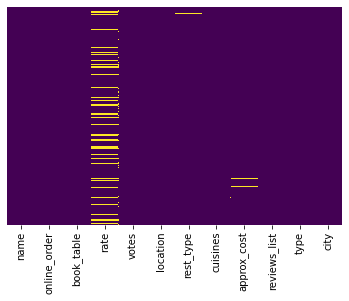

In [22]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="viridis")

In [23]:
# we can see that we have more number of missings in "rate" variables

In [24]:
# handling missing values
def missing_value_treat(x):
    if ((x.dtype=="int") | (x.dtype=="float")):
        x = x.fillna(x.median())
    elif ((x.dtype=="object") | (x.dtype=="O")):
        x = x.fillna(x.mode()[0])
    else:
        x = x
    return x

In [25]:
df = df.apply(missing_value_treat)

In [26]:
df.isnull().sum()

name            0
online_order    0
book_table      0
rate            0
votes           0
location        0
rest_type       0
cuisines        0
approx_cost     0
reviews_list    0
type            0
city            0
dtype: int64

In [27]:
# taking total number of cuisines by each restaurent
df["Number_of_cuisines"] = [len(x.split(",")) for x in df.cuisines]

In [28]:
# statistical summary for numerical variables
df.describe()

,rate,votes,approx_cost,Number_of_cuisines
count,51645.000000,51645.000000,51645.000000,51645.000000
mean,3.700424,283.968555,554.513022,2.453267
std,0.395539,804.317863,437.677622,1.270456
min,1.800000,0.000000,40.000000,1.000000
25%,3.500000,7.000000,300.000000,2.000000
50%,3.700000,41.000000,400.000000,2.000000
75%,3.900000,198.000000,650.000000,3.000000
max,4.900000,16832.000000,6000.000000,8.000000


In [29]:
# statistical summary for categorical variables
df.describe(include="object")

,name,online_order,book_table,location,rest_type,cuisines,reviews_list,type,city
count,51645,51645,51645,51645,51645,51645,51645,51645,51645
unique,8792,2,2,93,93,2723,22513,7,30
top,Cafe Coffee Day,Yes,No,BTM,Quick Bites,North Indian,[],Delivery,BTM
freq,96,30386,45208,5130,19328,2952,7574,25888,3268


### After performing the basic Data Cleaning steps, 
### will now perform Data Visualization to gain more insights from the data

C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


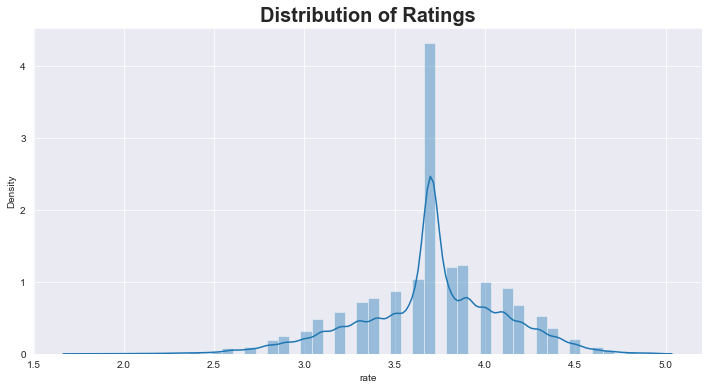

In [30]:
sns.set_style("darkgrid")
plt.figure(figsize=(12,6))
sns.distplot(df["rate"])
plt.title("Distribution of Ratings", fontsize=20, fontweight="bold")
plt.show()

**Observation :** Most of the restaurants have ratings between 3.5 to 4. Restaurants having ratings more than 4.5 and less than 2.5 are very rare.

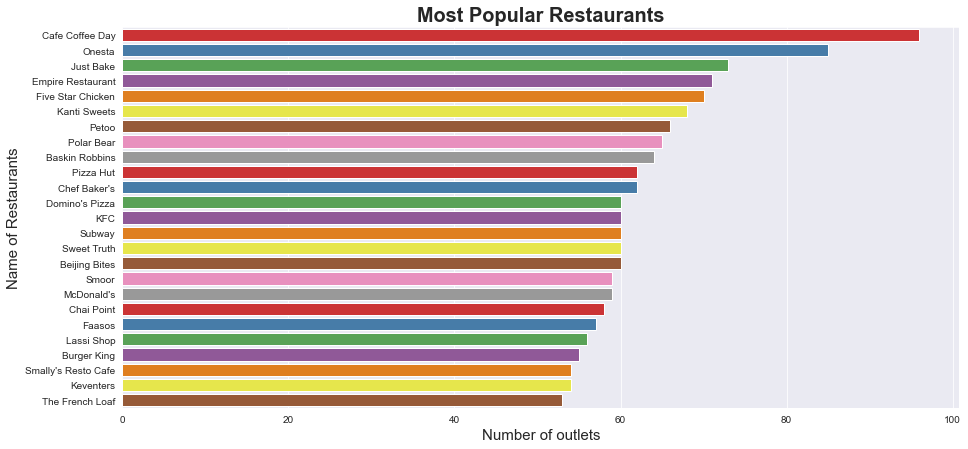

In [31]:
plt.figure(figsize=(15,7))
compitators = df.name.value_counts().nlargest(25)
sns.barplot(x=compitators, y=compitators.index, palette="Set1")
plt.title("Most Popular Restaurants", fontsize=20, fontweight="bold")
plt.xlabel("Number of outlets", size=15)
plt.ylabel("Name of Restaurants", size=15)
plt.show()

**Observation :** Cafe Coffee Day have maximum number of outlets in the city which is near to 100 followed by Onesta with more than 80 outlets. It can be observed that most of the popular Restaurants have  more than 50 outlets in the city

In [32]:
df.location.value_counts()

BTM                      5130
HSR                      2522
Koramangala 5th Block    2503
JP Nagar                 2234
Whitefield               2141
                         ... 
West Bangalore              6
Yelahanka                   6
Jakkur                      3
Rajarajeshwari Nagar        2
Peenya                      1
Name: location, Length: 93, dtype: int64

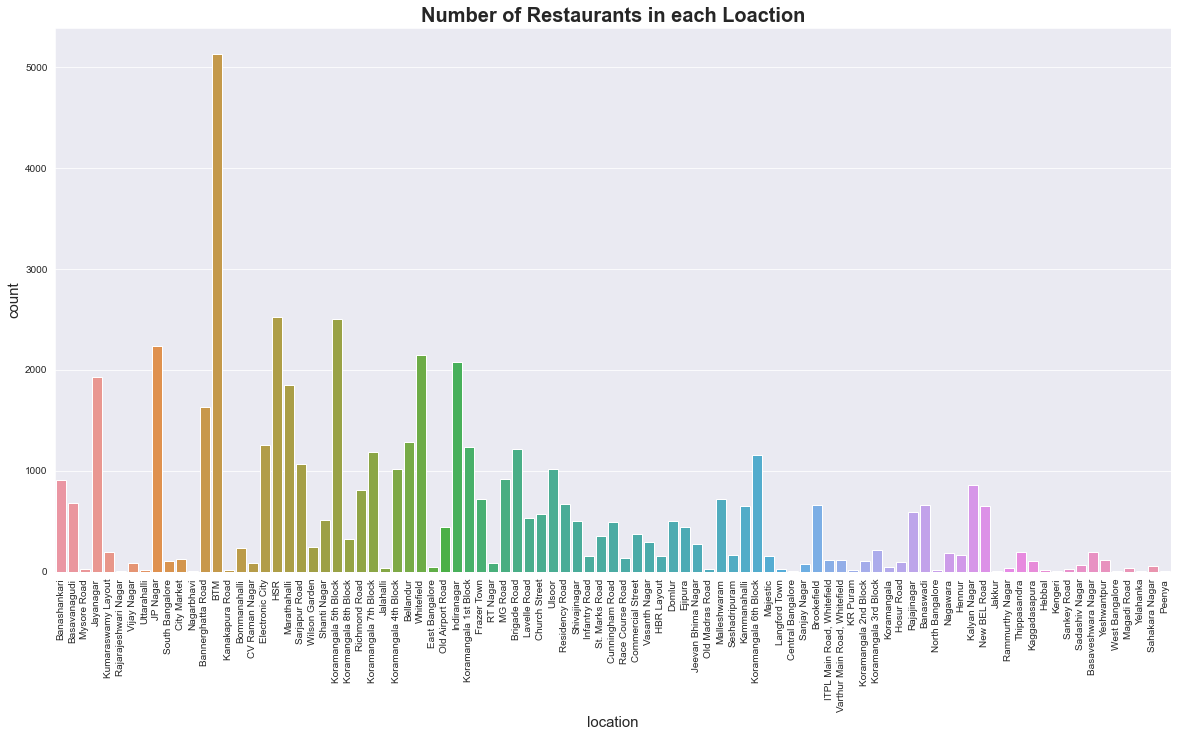

In [33]:
plt.figure(figsize=(20,10))
sns.countplot(x="location", data=df)
plt.title("Number of Restaurants in each Loaction", fontsize=20, fontweight="bold")
plt.xlabel("location", fontsize=15)
plt.ylabel("count", fontsize=15)
plt.xticks(rotation=90)
plt.show()

**Observation :** BTM has maximum number of restaurants which is more than 5000. JP Nagar, HRS, Kormangala 5th block, White feild, Indiranagar have more than 2000 restaurants and Jayanagar, Marathalli, Bannerghatta Road, Electronic city have more thn 1000 restaurants

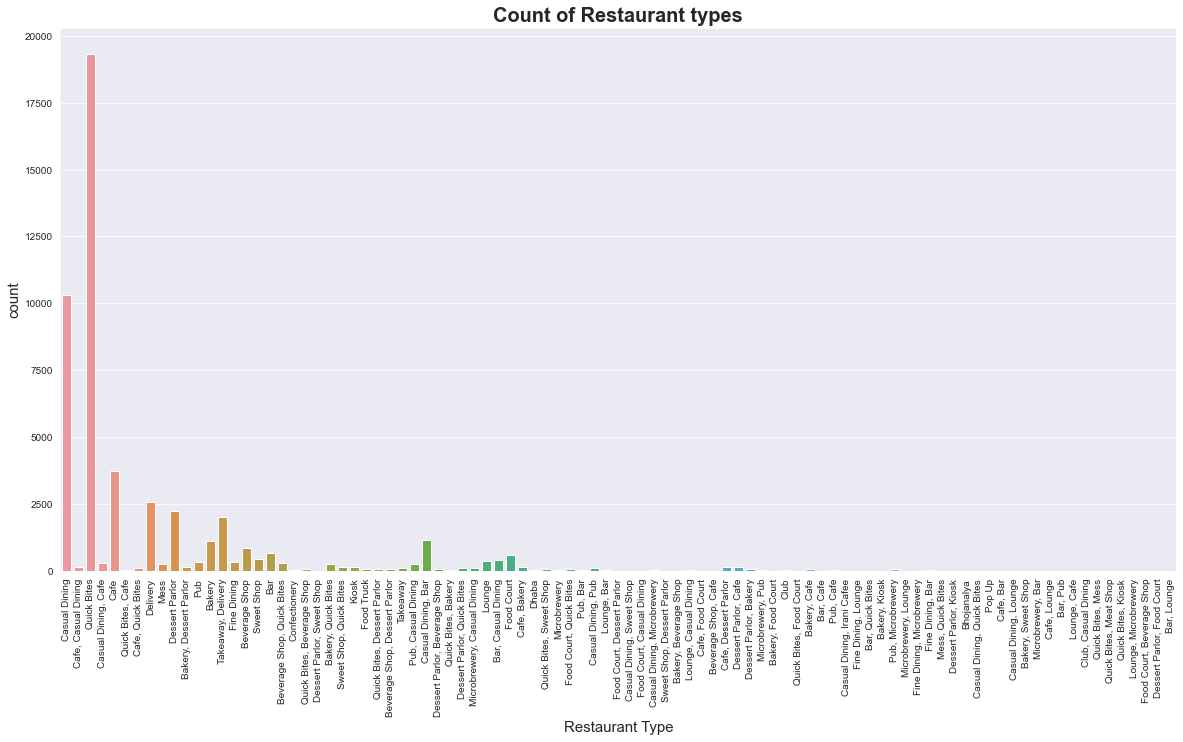

In [34]:
plt.figure(figsize=(20,10))
sns.countplot(x="rest_type", data=df)
plt.title("Count of Restaurant types", fontsize=20, fontweight="bold")
plt.xlabel("Restaurant Type", fontsize=15)
plt.ylabel("count", fontsize=15)
plt.xticks(rotation=90)
plt.show()

**Observation :** Quick Bites is the most popular restaurant type in the city as it's count is near to 19000. Casual Dining is second most popular restaurant type with more than 10000 records.Cafe, Delivery, Dessert Parlour, Takeaway Delivery are some other common restaurant types 

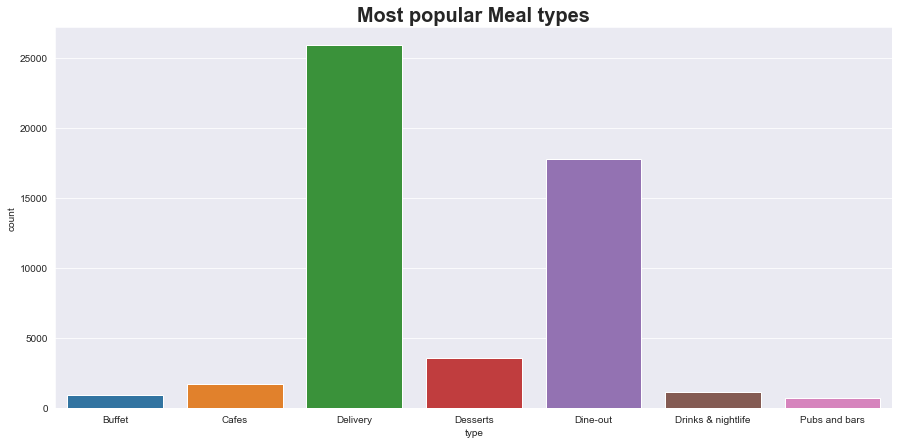

In [35]:
plt.figure(figsize=(15,7))
sns.countplot(x="type", data=df)
plt.title("Most popular Meal types", fontsize=20, fontweight="bold")
plt.show()

**Observation:** Delivery is the most popular meal type with more than 25000 counts, followed by Dine-Out with more than 15000 records. Buffet and Pubs & Bars have very less amount of records

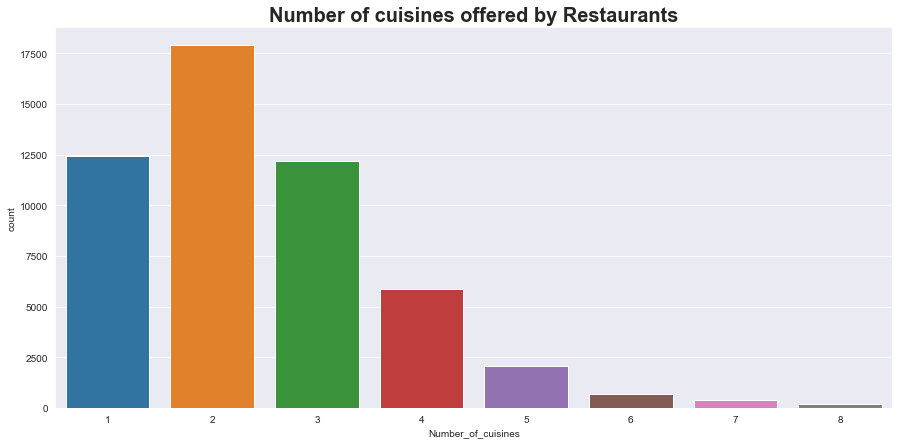

In [36]:
plt.figure(figsize=(15,7))
sns.countplot(x="Number_of_cuisines", data=df)
plt.title("Number of cuisines offered by Restaurants", fontsize=20, fontweight="bold")
plt.show()

**Observations :** Maximum number of the restaurants (ie 17500 restaurants) offers 2 types of cuisines, followed by near to 12500 restaurants which offers 1 type or 3 types of cuisines, and more than 5000 restaurnats offeres 4 types of cuisines. Very less number of restaurants offers more than 4 types of cuisines

C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


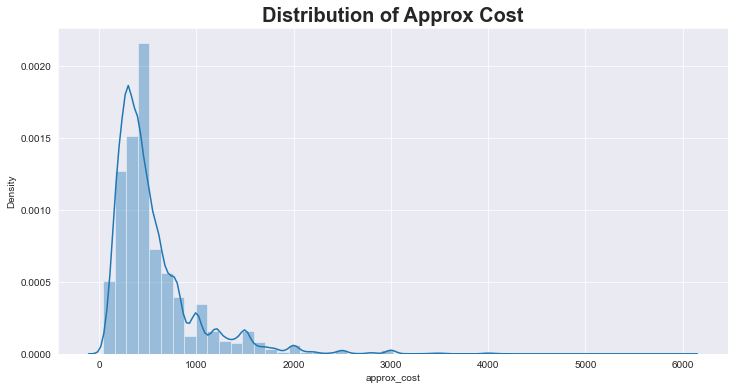

In [37]:
plt.figure(figsize=(12,6))
sns.distplot(df["approx_cost"])
plt.title("Distribution of Approx Cost", fontsize=20, fontweight="bold")
plt.show()

**Observation :** Maximum of the Restaurants have Approx Cost less than 1000. very less amount restaurants Approx Cost more than 1000

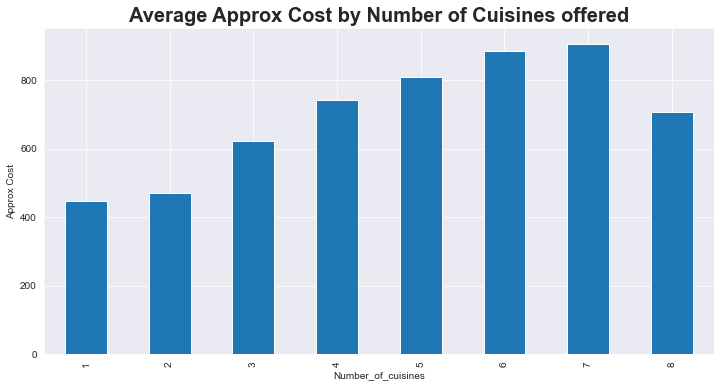

In [38]:
pd.pivot_table(index="Number_of_cuisines", values="approx_cost", data=df).plot(kind="bar", figsize=(12,6), legend=False)
plt.title("Average Approx Cost by Number of Cuisines offered", fontsize=20, fontweight="bold")
plt.ylabel("Approx Cost")
plt.show()

**Observation :** Restaurants which offers 7 type of of cuisines have the highest Approx cost (more than Rs 800), Restuarnats which offers 6 type of cuisines have approx cost lesser than restaurants which offers 7 types of cuisines.

From the gragh we observed that Restaurants offers more number of cuisines will have high Approx cost.

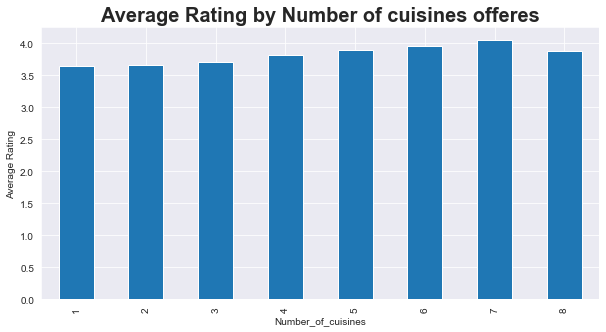

In [39]:
df.groupby(by="Number_of_cuisines")[["rate"]].mean().plot(kind="bar", figsize=(10,5), legend=False)
plt.title("Average Rating by Number of cuisines offeres", fontsize=20, fontweight="bold")
plt.ylabel("Average Rating")
plt.show()

**Observation :** Restaurants which offeres 7 cuisines have highest Average Rating, followed by Restaurants which offeres 6.
    
From the above gragh we observed that Restaurants which offers more number of cuisines will usually get high rating

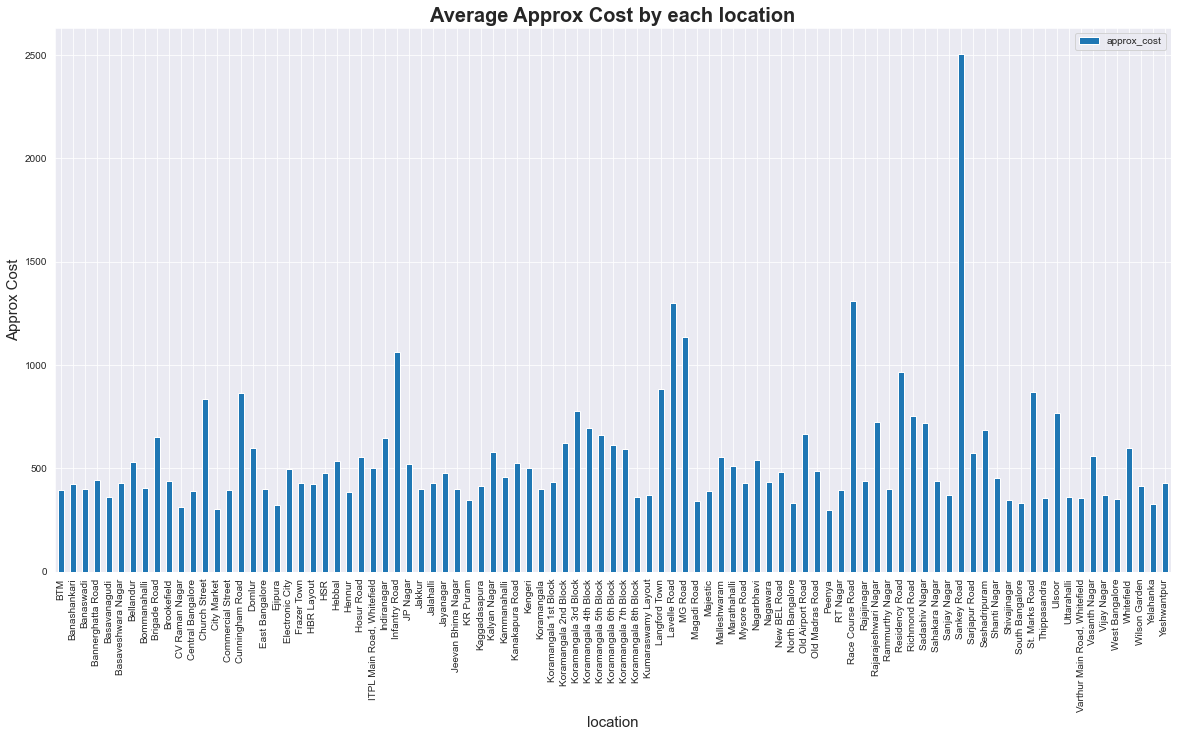

In [40]:
df.groupby(by="location")[["approx_cost"]].mean().plot(kind="bar", figsize=(20,10))
plt.xlabel("location", fontsize=15)
plt.ylabel("Approx Cost", fontsize=15)
plt.title("Average Approx Cost by each location", fontsize=20, fontweight="bold")
plt.show()

**Observation :** Restaurants in Sankey Road have the highest Approx Cost which is around Rs 2500. Restaurants in Race Course Road, Lavelle Road, MG Road & Infantry Road have Approx Cost which is more than Rs 1000. Most of Restaurants in other locations have apporx cost less than Rs 1000.

C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


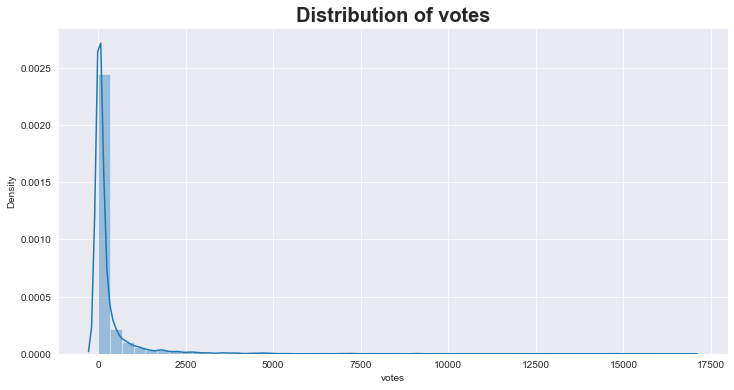

In [41]:
plt.figure(figsize=(12,6))
sns.distplot(df["votes"])
plt.title("Distribution of votes", fontsize=20, fontweight="bold")
plt.show()

**Observations :** Most of the votes are less than Rs 1000. very less amount of votes are more than Rs 1000

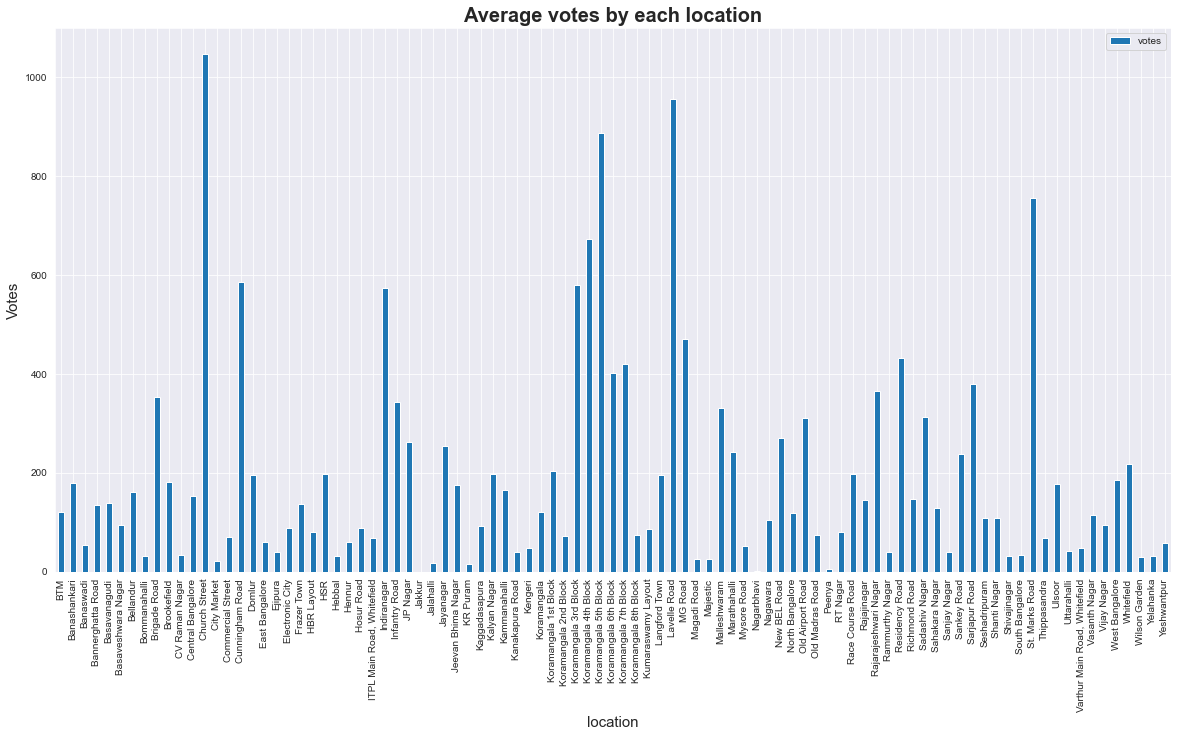

In [42]:
df.groupby(by="location")[["votes"]].mean().plot(kind="bar", figsize=(20,10))
plt.xlabel("location", fontsize=15)
plt.ylabel("Votes", fontsize=15)
plt.title("Average votes by each location", fontsize=20, fontweight="bold")
plt.show()

**Observation :** Restaurants in the Church Street has maxmimum average votes (ie. more than 1000), Restaurants in Lavelle Road, Koramangala 5th Block, St. Marks Road, Koramangala 4th Block, Cunningham Road, Koramangala 3rd Block, Indiranagar locations have votes more than 500, and rest all Restaurants have less than 500 votes

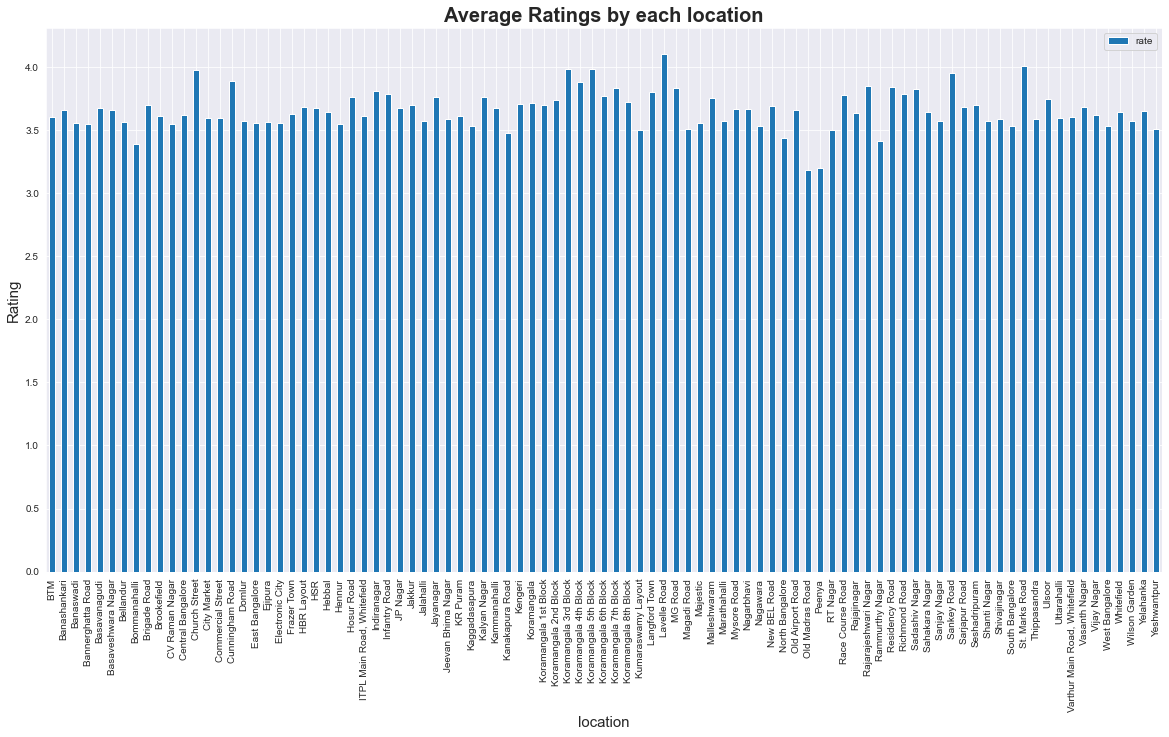

In [43]:
df.groupby(by="location")[["rate"]].mean().plot(kind="bar", figsize=(20,10))
plt.xlabel("location", fontsize=15)
plt.ylabel("Rating", fontsize=15)
plt.title("Average Ratings by each location", fontsize=20, fontweight="bold")
plt.show()

**Observation :** Restaurants in the Lavelle Road has higest Average Rating (ie. greater than 4), Restaurants in St. Marks Road, Koramangala 5th Block, Koramangala 3rd Block, Church Street
and Sankey Road locations have average ratings almost near to 4, and rest all Restaurants have average ratings in between 3 to 4.

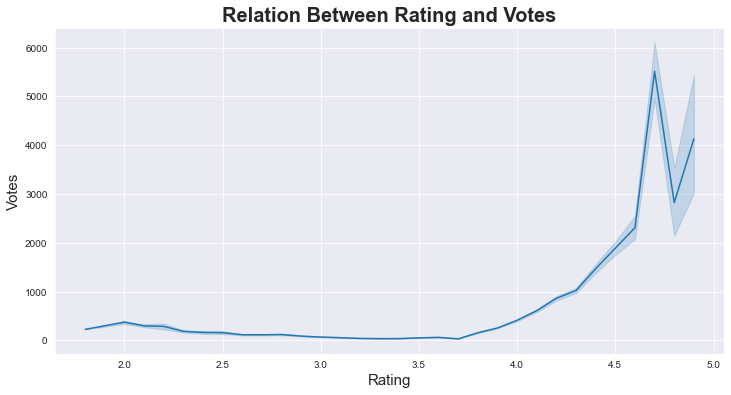

In [44]:
plt.figure(figsize=(12,6))
sns.lineplot(x="rate", y="votes", data=df)
plt.xlabel("Rating", fontsize=15)
plt.ylabel("Votes", fontsize=15)
plt.title("Relation Between Rating and Votes", fontsize=20, fontweight="bold")
plt.show()

**Observation :** From the above line plot we can understand that both Rating and Votes have positive linear relationship.
    
Here Restaurants with higher rating have maximum number of votes and Restaurants with lower rating have minimum number of votes 
   

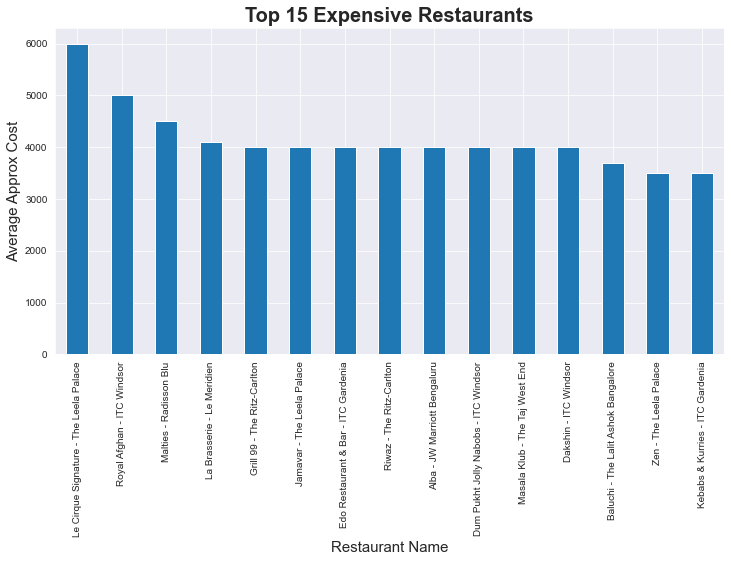

In [45]:
top15 = pd.pivot_table(index="name", values="approx_cost", data=df).sort_values(by="approx_cost", ascending=False).head(15)
top15.plot(kind="bar", legend=False, figsize=(12,6))
plt.xlabel("Restaurant Name", fontsize=15)
plt.ylabel("Average Approx Cost", fontsize=15)
plt.title("Top 15 Expensive Restaurants", fontsize=20, fontweight="bold")
plt.show()

**Observation :** Here we got top 15 expensive hotels in bangalore. Le Cirque Signature - The Leela Palace is the most expensive hotel in bangalore

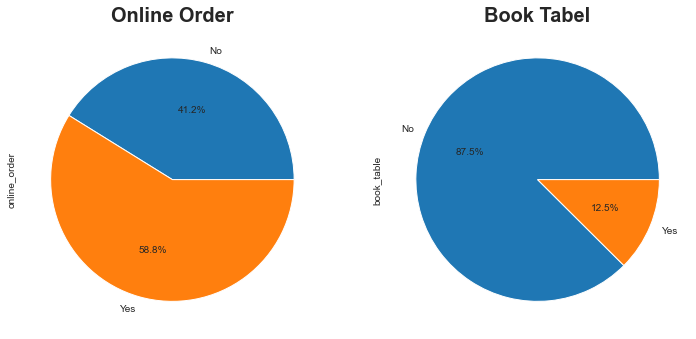

In [46]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
df.groupby(["online_order"])["online_order"].count().plot(kind="pie", autopct="%1.1f%%")
plt.title("Online Order", fontsize=20, fontweight="bold")
plt.xticks(ticks=[])

plt.subplot(1,2,2)
df.groupby(["book_table"])["book_table"].count().plot(kind="pie", autopct="%1.1f%%")
plt.title("Book Tabel", fontsize=20, fontweight="bold")
plt.show()

**Observation :** 
- Total 56.8% of Restaurants provide Online Ordering facility and 41.2% of Restaurant doesn't provide Online Ordering facility
- Only 12.5% of Restaurants provide Table Booking facility and 87.5% of Restaurants doesn't provide Tbale booking facility

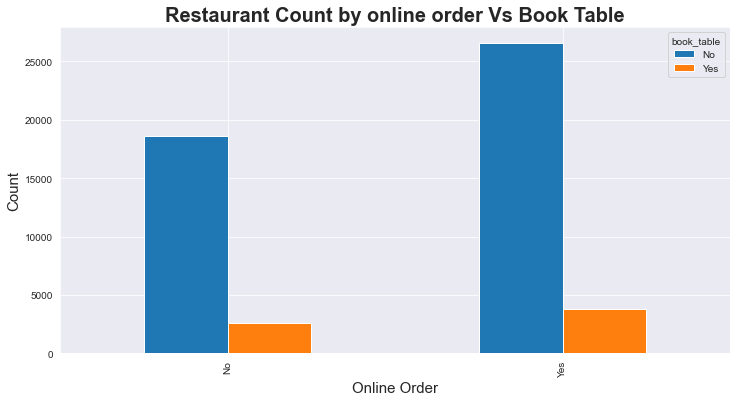

In [49]:
pd.crosstab(df.online_order, df.book_table).plot(kind="bar", figsize=(12,6))
plt.xlabel("Online Order", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Restaurant Count by online order Vs Book Table", fontsize=20, fontweight="bold")
plt.show()

**Observation :** 
- Maximum number of the Restaurants provides only online ordering facility.
- Restaurants which provide both online ordeing and book table facility are very less.
- very least number of Restaurants provides only book table facility.
- More than 15000 Restaurants doesn't provide online ordering as well as book table facility.

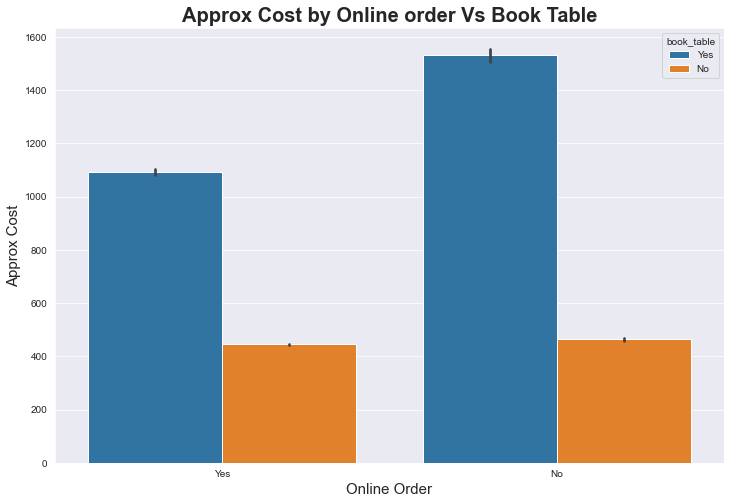

In [50]:
plt.figure(figsize=(12,8))
sns.barplot(x="online_order", y="approx_cost", hue="book_table", data=df)
plt.title("Approx Cost by Online order Vs Book Table", fontsize=20, fontweight="bold")
plt.xlabel("Online Order", fontsize=15)
plt.ylabel("Approx Cost", fontsize=15)
plt.show()

**Observation :** 
- Restaurants which provide only Table Booking facility have highest amount of Approx Cost (ie. more than Rs 1500)
- Restaurants which provide both Online Ordering and Table Booking facility have Approx Cost more than Rs 1000
- Restaurants which provide only Online Ordering facility and the Restaurants which doesn't provide Online Ordering as well as Tbale Booking facilities have the least amount of Approx Cost (ie. around Rs 400) 

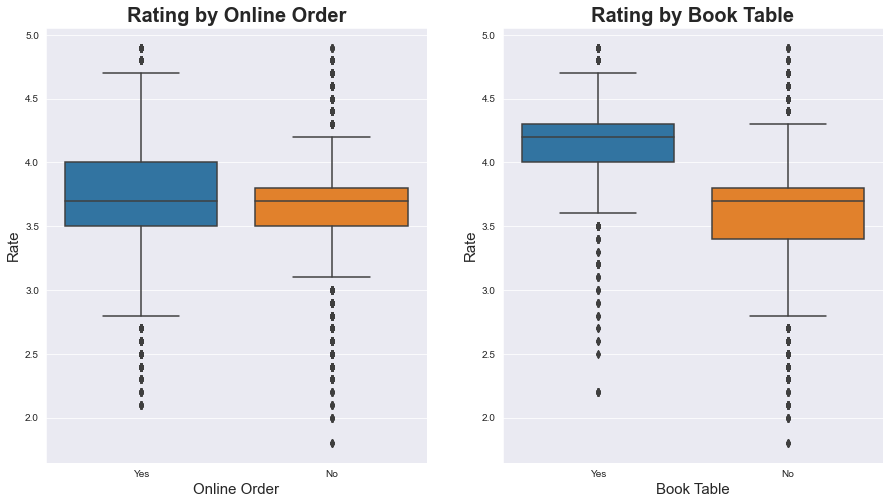

In [51]:
plt.figure(figsize=(15,8))

plt.subplot2grid((1,2),(0,0))
sns.boxplot(x='online_order', y="rate", data=df)
plt.title('Rating by Online Order', fontsize=20, fontweight='bold')
plt.xlabel("Online Order", fontsize=15)
plt.ylabel("Rate", fontsize=15)

plt.subplot2grid((1,2),(0,1))
sns.boxplot(x='book_table', y="rate", data=df)
plt.title('Rating by Book Table', fontsize=20, fontweight='bold')
plt.xlabel("Book Table", fontsize=15)
plt.ylabel("Rate", fontsize=15)

plt.show()

**Observation :** 
- The left boxplot in the above explains that the median Rating for Restaurants which accept online orders and doesn't accept online orders is same for both (ie. above 3.5)
- The right boxplot in the above explains that the median Rating for Restaurants which provide Table Booking facaility is above 4 and for the Restaurants which doesn't provide Table Booking facility is less than 4.

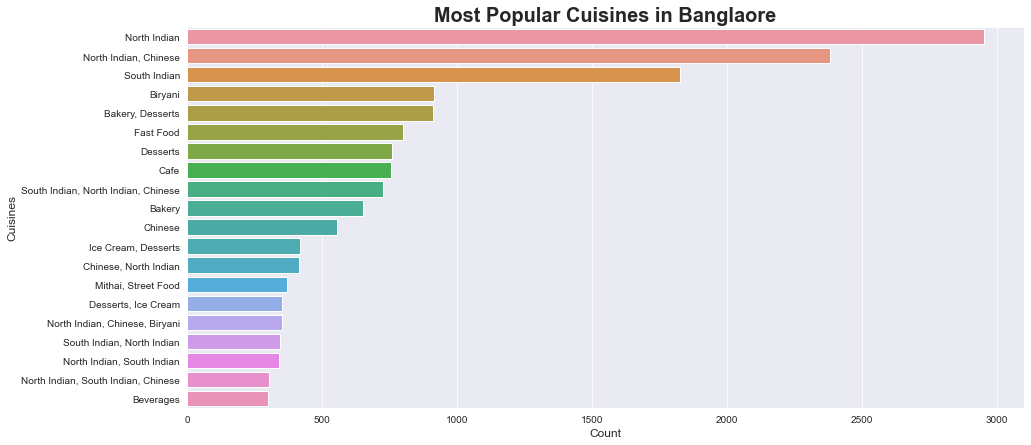

In [52]:
popular_cuisines = df["cuisines"].value_counts().head(20)
plt.figure(figsize=(15,7))
sns.barplot(x=popular_cuisines.values, y=popular_cuisines.index)
plt.title('Most Popular Cuisines in Banglaore', fontsize=20, fontweight='bold')
plt.xlabel("Count", fontsize=12)
plt.ylabel("Cuisines", fontsize=12)
plt.show()

**Observation :** Here we got the top 20 popular Cuisines in Bangalore. We can see that North Indian is the most popular cuisine in Bangalore. "North Indian, Chinese", South Indian, Biriyani, "Bakery,Desserts" and Fast Food are some of the popular cuisines.

### Sentiment analysis using Textblob module to get useful information from the text variable "review_text"

In [53]:
from textblob import TextBlob

In [54]:
df['sentiment_score'] = df["reviews_list"].apply(lambda x: TextBlob(x).sentiment.polarity )

In [55]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost,reviews_list,type,city,Number_of_cuisines,sentiment_score
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari,3,0.329379
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari,3,0.182998
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari,3,0.146318
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari,2,0.245691
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari,2,0.419160


In [56]:
df['sentiment'] = np.where(df.sentiment_score>0.05,'Positive',np.where(df.sentiment_score<-0.05, 'Negative', 'Neutral'))

In [57]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost,reviews_list,type,city,Number_of_cuisines,sentiment_score,sentiment
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari,3,0.329379,Positive
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari,3,0.182998,Positive
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari,3,0.146318,Positive
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari,2,0.245691,Positive
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari,2,0.419160,Positive


In [58]:
df.sentiment.value_counts()

Positive    37784
Neutral     10781
Negative     3080
Name: sentiment, dtype: int64

In [59]:
df.sentiment.value_counts()/sum(df.sentiment.value_counts())

Positive    0.731610
Neutral     0.208752
Negative    0.059638
Name: sentiment, dtype: float64

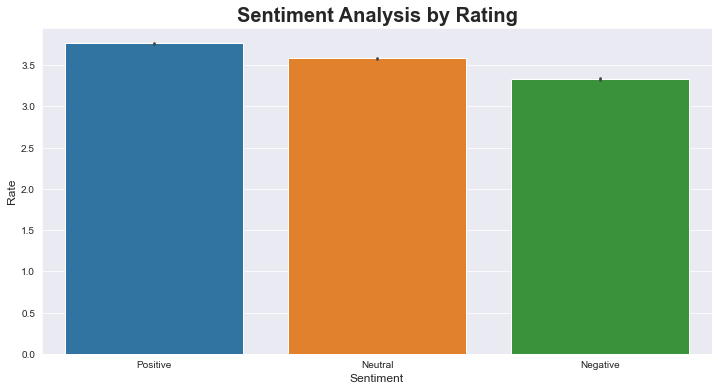

In [60]:
plt.figure(figsize=(12,6))
sns.barplot(x="sentiment", y="rate", data=df)
plt.title("Sentiment Analysis by Rating", fontsize=20, fontweight="bold")
plt.xlabel("Sentiment", fontsize=12)
plt.ylabel("Rate", fontsize=12)
plt.show()

**Observation :** Sentiment(reviews_list) & Rating are highly correlated with each other. Restaurants with Positive Review usually have higher avarage Rating(ie. Above 3.5) & Restaurants with Negative Review usually have lower avarage Rating(below 3.5). Restaurants with Neutral Review have avarage Rating around 3.5

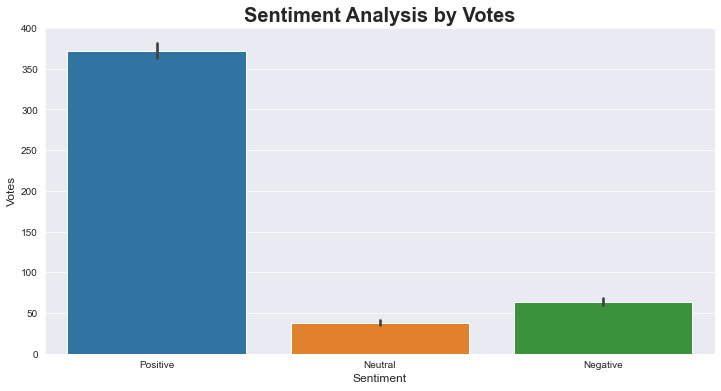

In [61]:
plt.figure(figsize=(12,6))
sns.barplot(x="sentiment", y="votes", data=df)
plt.title("Sentiment Analysis by Votes", fontsize=20, fontweight="bold")
plt.xlabel("Sentiment", fontsize=12)
plt.ylabel("Votes", fontsize=12)
plt.show()

**Observation :** Restuarants with Positive Review have high number of Votes. Restaurants with Neutral & Negative Reviews have less number of Votes

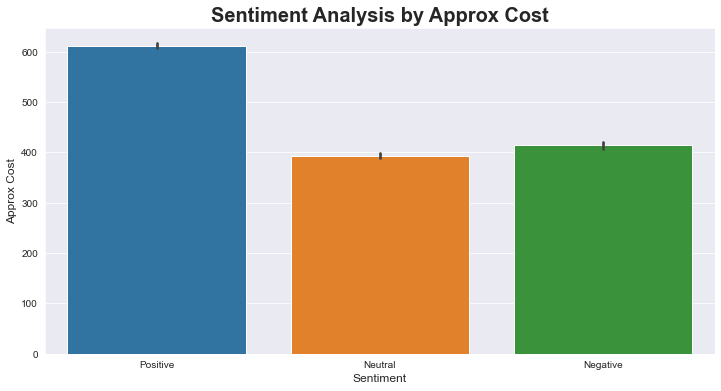

In [62]:
plt.figure(figsize=(12,6))
sns.barplot(x="sentiment", y="approx_cost", data=df)
plt.title("Sentiment Analysis by Approx Cost", fontsize=20, fontweight="bold")
plt.xlabel("Sentiment", fontsize=12)
plt.ylabel("Approx Cost", fontsize=12)
plt.show()

**Observation :** Restuarants with Positive Review have high Approx Cost (ie. above Rs 600). Restaurants with Neutral & Negative Review have low Approx Cost (ie. around Rs 400)